<a href="https://colab.research.google.com/github/Jhon-Fredy-Hernandez-Martinez/TalentoTECH/blob/main/Caso_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo CSV en Google Drive
file_path = 'https://drive.google.com/uc?id=1vdQydrnZ0IObkotwRs7iy0OFzVcRbvWp'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)
print(df)
df

Mounted at /content/drive
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. Exploración basica de **datos**

In [2]:

# Estadistica descriptiva
df_stats = df.describe()
df_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#Comprobando los tipos de datos
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# 2. Análisis de **supervivencia**

In [4]:
# Calcular el número total de pasajeros
total_passengers = len(df)

# Calcular el número de pasajeros que sobrevivieron (1 = sobrevivió, 0 = no sobrevivió)
survived_passengers = df['Survived'].sum()

# Calcular la tasa de supervivencia global
survival_rate = survived_passengers / total_passengers
survival_rate_percentage = survival_rate * 100

# Imprimir la tasa de supervivencia global como porcentaje
print("Tasa de supervivencia global: {:.2f}%".format(survival_rate_percentage))

Tasa de supervivencia global: 38.38%


In [5]:
# Calcular el número total de pasajeros por género
total_passengers_by_gender = df['Sex'].value_counts()

# Calcular el número de pasajeros que sobrevivieron por género
survived_passengers_by_gender = df.groupby('Sex')['Survived'].sum()

# Calcular la tasa de supervivencia por género
survival_rate_by_gender = (survived_passengers_by_gender / total_passengers_by_gender) * 100

# Convertir la Serie a un DataFrame
survival_rate_by_gender_df = survival_rate_by_gender.to_frame()

# Asignar un nombre a la columna de porcentaje
survival_rate_by_gender_df.columns = ['Porcentaje de Supervivencia']

# Imprimir el DataFrame
print("Tasa de supervivencia por género como porcentaje:")
print(survival_rate_by_gender_df)

Tasa de supervivencia por género como porcentaje:
        Porcentaje de Supervivencia
Sex                                
female                    74.203822
male                      18.890815


In [6]:
# Calcular el número total de pasajeros por clase
total_passengers_by_class = df['Pclass'].value_counts()

# Calcular el número de pasajeros que sobrevivieron por clase
survived_passengers_by_class = df.groupby('Pclass')['Survived'].sum()

# Calcular la tasa de supervivencia por clase
survival_rate_by_class = (survived_passengers_by_class / total_passengers_by_class) * 100

# Convertir la Serie a un DataFrame
survival_rate_by_class_df = survival_rate_by_class.to_frame()

# Asignar un nombre a la columna de porcentaje
survival_rate_by_class_df.columns = ['Porcentaje de Supervivencia por Clase']

# Imprimir el DataFrame
print("Tasa de supervivencia por clase como porcentaje:")
print(survival_rate_by_class_df)

Tasa de supervivencia por clase como porcentaje:
        Porcentaje de Supervivencia por Clase
Pclass                                       
1                                   62.962963
2                                   47.282609
3                                   24.236253


In [7]:
# Calcular el número total de pasajeros por edad
total_passengers_by_age = df['Age'].value_counts()

# Calcular el número de pasajeros que sobrevivieron por edad
survived_passengers_by_age = df.groupby('Age')['Survived'].sum()

# Calcular la tasa de supervivencia por clase
survival_rate_by_age = (survived_passengers_by_age / total_passengers_by_age) * 100

# Convertir la Serie a un DataFrame
survival_rate_by_age_df = survival_rate_by_age.to_frame()

# Asignar un nombre a la columna de porcentaje
survival_rate_by_age_df.columns = ['Porcentaje de Supervivencia por Edad']

# Imprimir el DataFrame
print("Tasa de supervivencia por clase como porcentaje:")
print(survival_rate_by_age_df)


Tasa de supervivencia por clase como porcentaje:
       Porcentaje de Supervivencia por Edad
Age                                        
0.42                                  100.0
0.67                                  100.0
0.75                                  100.0
0.83                                  100.0
0.92                                  100.0
...                                     ...
70.00                                   0.0
70.50                                   0.0
71.00                                   0.0
74.00                                   0.0
80.00                                 100.0

[88 rows x 1 columns]


# 2. Visualización de **datos**

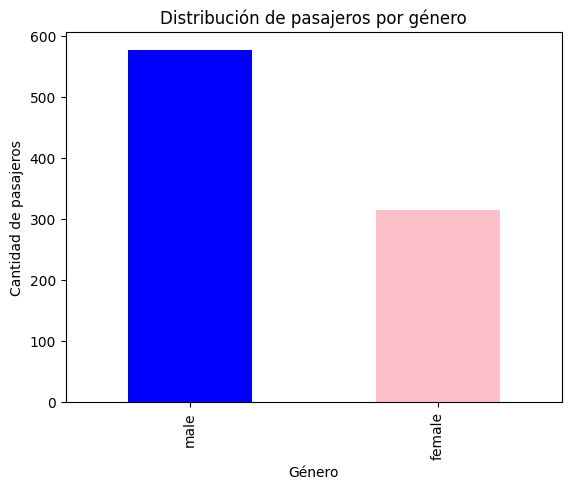

In [8]:

# Calcular la cantidad de pasajeros por género
passengers_by_gender = df['Sex'].value_counts()

# Crear el gráfico de barras
passengers_by_gender.plot(kind='bar', color=['blue', 'pink'])

# Añadir título y etiquetas a los ejes
plt.title('Distribución de pasajeros por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de pasajeros')

# Mostrar la gráfica
plt.show()

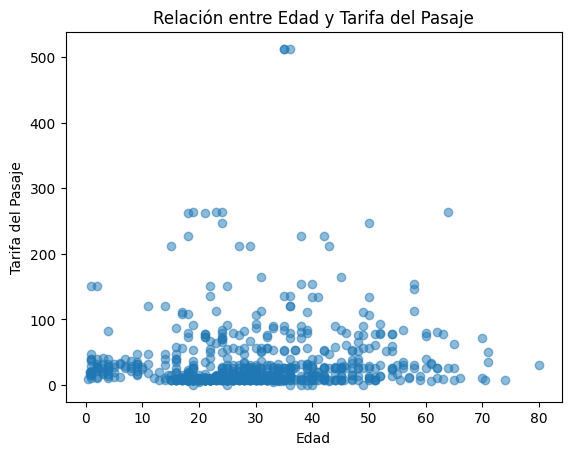

In [9]:
# Crear el gráfico de dispersión
plt.scatter(df['Age'], df['Fare'], alpha=0.5)

# Añadir título y etiquetas a los ejes
plt.title('Relación entre Edad y Tarifa del Pasaje')
plt.xlabel('Edad')
plt.ylabel('Tarifa del Pasaje')

# Mostrar la gráfica
plt.show()

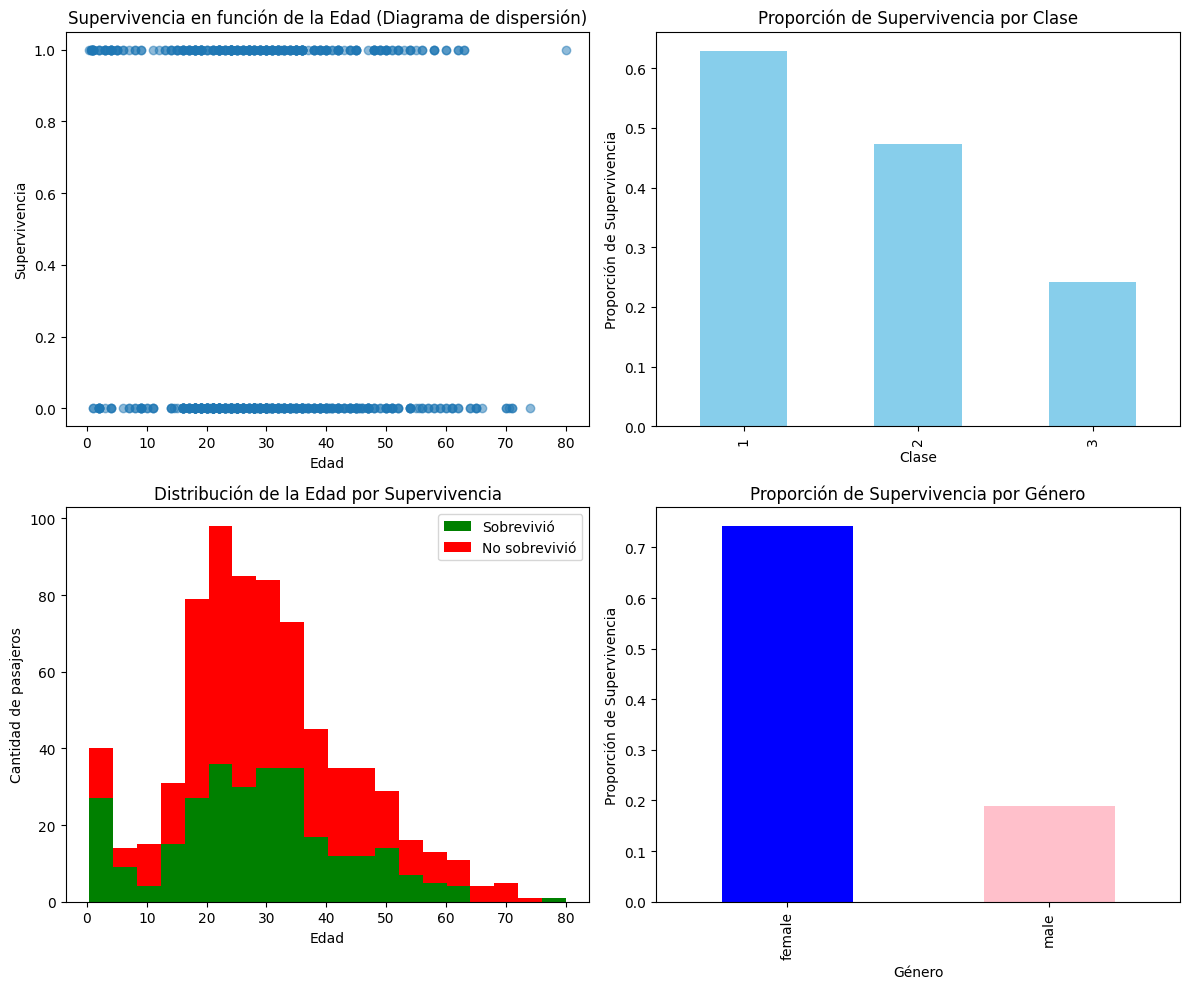

In [10]:

# Configuración de la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# En función de la edad
# Diagrama de dispersión
axs[0, 0].scatter(df['Age'], df['Survived'], alpha=0.5)
axs[0, 0].set_title('Supervivencia en función de la Edad (Diagrama de dispersión)')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Supervivencia')

# Histograma
axs[1, 0].hist([df[df['Survived'] == 1]['Age'], df[df['Survived'] == 0]['Age']], bins=20, stacked=True, color=['green', 'red'], label=['Sobrevivió', 'No sobrevivió'])
axs[1, 0].set_title('Distribución de la Edad por Supervivencia')
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Cantidad de pasajeros')
axs[1, 0].legend()

# En función de la clase
# Diagrama de barras
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Proporción de Supervivencia por Clase')
axs[0, 1].set_xlabel('Clase')
axs[0, 1].set_ylabel('Proporción de Supervivencia')

# En función del género
# Diagrama de barras
df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axs[1, 1], color=['blue', 'pink'])
axs[1, 1].set_title('Proporción de Supervivencia por Género')
axs[1, 1].set_xlabel('Género')
axs[1, 1].set_ylabel('Proporción de Supervivencia')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()